In [1]:
EXPERIMENTS = [
    # "none-default=none-META=25-metric=[harmonic_mean_recall_2]",
    # "weighting-default=weighting-META=25-metric=[harmonic_mean_recall_2]",
    # "SVMSMOTE-default=SVMSMOTE-META=25-metric=[harmonic_mean_recall_2]",

    # "RF",
    # "SVMSMOTE+RF",
    # "weighting+RF",

    # "SVMSMOTE-default=SVMSMOTE-META=25-sampling_strategy=False",
    # "none-default=none-META=25",
    # "weighting-default=weighting-META=25",
    # "SVMSMOTE-default=SVMSMOTE-META=25",

    # "none-default=none-META=25-callback",
    # "weighting-default=weighting-META=25-callback",
    # "SVMSMOTE-default=SVMSMOTE-META=25-callback",

    "all_SMOTE_like+weighting+none-default=SVMSMOTE-META=25",
    # "weighting+none-default=weighting-META=25",
    # "BorderlineSMOTE+weighting+none-default=BorderlineSMOTE-META=25",
    # "SMOTETomek+weighting+none-default=weighting-META=25",
    # "SMOTEENN+weighting+none-default=weighting-META=25",
    # "ADASYN+weighting+none-default=weighting-META=25",
    # "SMOTE+weighting+none-default=weighting-META=25",
    # "SVMSMOTE+weighting+none-default=SVMSMOTE-META=25",
]

In [19]:
from file_loader import get_models
from datasets import get_datasets
from collections import defaultdict, Counter
from tabulate import tabulate

import sys
sys.path.insert(0, "../my_autosklearn")

def stop_after_100_configurations_callback(smbo, run_info, result, time_left):
    return sum("SUCCESS" in str(val.status) for val in smbo.runhistory.data.values()) <= 116

c = Counter()
preps = ['NoPreprocessing','Weighting','SVMSMOTE','BorderlineSMOTE','SMOTEENN','SMOTE','SMOTETomek', 'ADASYN',]
for model, dataset_name, ratio, experiment_name in get_models(get_datasets(), EXPERIMENTS):
    try:
        ensemble = model.show_models().values()
    except:
        continue

    a = Counter()
    for m in ensemble:
        preproc = str(m["balancing"]).split("(")[0]
        #clf = str(m["classifier"]).split("(")[0]
        a[(preproc, )] += m["ensemble_weight"]
    
    for preproc in preps:
        c[preproc, ] += a[(preproc, )] + 1j

for (preproc, ), w in c.items():
    c[preproc, ] = w.real / w.imag
print(c)

Counter({('NoPreprocessing',): 0.31257142857142856, ('Weighting',): 0.2074285714285714, ('SVMSMOTE',): 0.18, ('BorderlineSMOTE',): 0.10514285714285719, ('SMOTEENN',): 0.06228571428571429, ('SMOTE',): 0.04628571428571429, ('SMOTETomek',): 0.04628571428571429, ('ADASYN',): 0.04000000000000001})


In [3]:
# def f(n):
#     return int(n.imag)
#     if n.imag == 0:
#         return 0
#     return n.real / n.imag
# ctr = c
# preps = list({a for a, _ in ctr})
# clfs = list({b for _, b in ctr})
# preps = sorted(preps, key=lambda p: -sum(f(ctr[(p, clf)]) for clf in clfs))
# clfs = sorted(clfs, key=lambda clf: -sum(f(ctr[(p, clf)]) for p in preps))
# table = [[clf] + [f(ctr[(p, clf)]) for p in preps] for clf in clfs]
# header = preps

# print(tabulate(table, header))


                              SVMSMOTE    NoPreprocessing    Weighting    SMOTETomek    SMOTEENN    BorderlineSMOTE    SMOTE    ADASYN
--------------------------  ----------  -----------------  -----------  ------------  ----------  -----------------  -------  --------
RandomForest                         1                  1            1             1           1                  1        1         1
ExtraTreesClassifier                 1                  1            1             1           1                  1        1         1
SGD                                  1                  1            1             1           1                  1        1         1
LDA                                  1                  0            1             1           1                  1        1         1
GradientBoostingClassifier           1                  1            1             1           1                  1        0         1
PassiveAggressive                    1                 

In [33]:
ctr = c
preps = sorted({a for a, in ctr}, key=lambda i: -ctr[(i, )])

table = [["average ensemble weight"] + [f"{ctr[p, ]:.2f}" for p in preps]]
print(sum(ctr.values()))

1.0


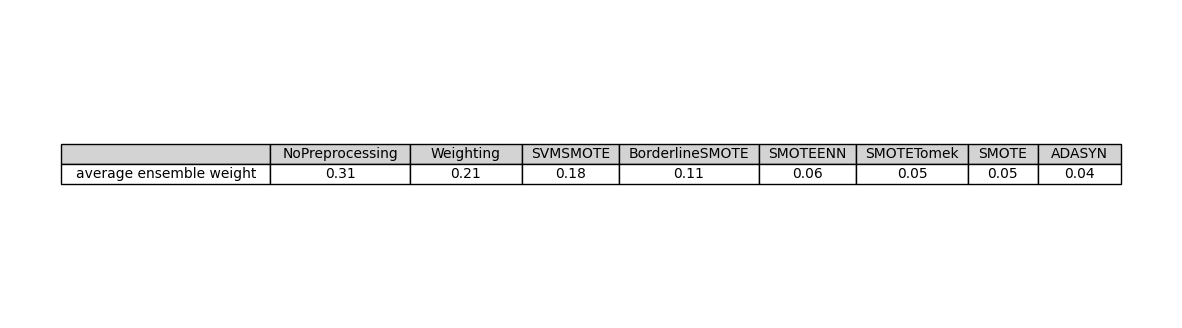

In [35]:
# Optionally, save the table as an image or export it
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame for better presentation
df = pd.DataFrame(table, columns=[""]+preps)

# Plotting the table
fig, ax = plt.subplots(figsize=(15, 4))  # set size frame
ax.axis('tight')
ax.axis('off')
x = [0.15, 0.10, 0.08, 0.07, 0.10, 0.07, 0.08, 0.05, 0.06]
the_table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['lightgrey']*df.shape[1], colWidths=x)


# Style the table
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.2)

# Save the table as an image file
plt.savefig("pretty_table.png", bbox_inches='tight', dpi=300)
plt.show()

In [5]:
print(EXPERIMENTS)

def print_table_pdf(table, header, size):
    assert len(header) == len(size), f"header: {len(header)}, size: {len(size)}"
    print("\\begin{tabular}{|p{" + str(size[0]) + "cm}||", end="")
    # print("p{2.5cm}|p{2.0cm}|p{3.0cm}|p{2.0cm}", end="")
    print("|".join(f"p{{{s}cm}}" for s in size[1:]), end="")
    print("|}")
    print("\\hline")
    print("&".join(header).replace("_", "\\_").replace("#", "\\#") + "\\\\")
    print("\\hline")
    for line in table:
        print("&".join(str(e) for e in line) + "\\\\")
    print("\\hline")
    print("\\end{tabular}")

['all_SMOTE_like+weighting+none-default=SVMSMOTE-META=25']


In [6]:
new = []
for (dataset_name, ratio), lst in table.items():
    # i == tuple(SUCCESS, TIMEOUT, CRASHED)
    new.append([dataset_name, f"{1/ratio:.2f}", *[i[0] for i in lst]])

print(tabulate(new))

AttributeError: 'list' object has no attribute 'items'

In [ ]:

new = []
for (dataset_name, ratio), lst in table2.items():
    new.append([dataset_name, ratio, *lst])

print(tabulate(new))

------------------------------------------  ---------  -  -  --------
diabetes(id=37)                             0.536      0  0  0.854355
diabetes(id=37)                             0.15       0  0  0.510418
diabetes(id=37)                             0.1        0  0  0.468163
diabetes(id=37)                             0.05       0  0  0.484603
pc3(id=1050)                                0.114041   0  0  0.381643
pc3(id=1050)                                0.1        0  0  0.415751
pc3(id=1050)                                0.05       0  0  0.463828
JM1(id=1053)                                0.239604   0  0  0.509741
JM1(id=1053)                                0.15       0  0  0.596594
JM1(id=1053)                                0.1        0  0  0.419808
JM1(id=1053)                                0.05       0  0  0.298191
KC2(id=1063)                                0.257831   0  0  0.75125
KC2(id=1063)                                0.15       0  0  0.505524
KC2(id=1063)         

In [ ]:
new = []
new2 = []
for (dataset_name, ratio), lst in table3.items():
    lst = [round(n, 4) for n in lst]
    assert lst[0] != lst[1] and lst[1] != lst[2] and lst[0] != lst[2]
    lst = [(j, i) for i, j in enumerate(lst)]
    lst.sort(reverse=True)
    new_lst = [0, 0, 0]
    new2.append([0, 0, 0])
    for rank, (val, i) in enumerate(lst, start=1):
        new_lst[i] = f"{100*val:.2f}/{rank}"
        new2[-1][i] = (val, rank)
    new.append([dataset_name, f"{1/ratio:.2f}", *new_lst])

new.sort(key=lambda i: float(i[1]))

scores = [], [], []
ranks = [], [], []
for (a1, b1), (a2, b2), (a3, b3) in new2:
    scores[0].append(a1)
    scores[1].append(a2)
    scores[2].append(a3)
    ranks[0].append(b1)
    ranks[1].append(b2)
    ranks[2].append(b3)

from metrics import mean, med

new.append(("", "", *[f"{100*mean(s):.4f}" for s in scores]))
new.append(("", "", *[f"{100*med(s):.4f}" for s in scores]))
new.append(("", "", *[f"{mean(s):.4f}" for s in ranks]))


def print_table_pdf(table, header, size):
    assert len(header) == len(size), f"header: {len(header)}, size: {len(size)}"
    print("\\begin{tabular}{|p{" + str(size[0]) + "cm}||", end="")
    # print("p{2.5cm}|p{2.0cm}|p{3.0cm}|p{2.0cm}", end="")
    print("|".join(f"p{{{s}cm}}" for s in size[1:]), end="")
    print("|}")
    print("\\hline")
    print("&".join(header).replace("_", "\\_").replace("#", "\\#") + "\\\\")
    print("\\hline")
    for line in table:
        print("&".join(str(e) for e in line) + "\\\\")
    print("\\hline")
    print("\\end{tabular}")


print_table_pdf(new, ["name", "IR"] + EXPERIMENTS, [1]*5)


\begin{tabular}{|p{1cm}||p{1cm}|p{1cm}|p{1cm}|p{1cm}|}
\hline
name&IR&none-default=none-META=25-callback&weighting-default=weighting-META=25-callback&SVMSMOTE-default=SVMSMOTE-META=25-callback\\
\hline
madelon(id=1485)&1.00&95.18/2&96.01/1&94.88/3\\
Bioresponse(id=4134)&1.18&88.12/2&88.14/1&88.11/3\\
diabetes(id=37)&1.87&83.77/2&84.10/1&83.73/3\\
qsar-biodeg(id=1494)&1.96&93.38/3&93.95/1&93.48/2\\
blood-transfusion-service-center(id=1464)&3.20&75.80/2&76.54/1&75.72/3\\
KC2(id=1063)&3.88&85.59/1&84.35/3&84.87/2\\
JM1(id=1053)&4.17&77.03/1&76.04/3&76.06/2\\
kc1(id=1067)&5.47&83.40/1&81.51/3&82.84/2\\
diabetes(id=37)&6.67&85.25/3&85.56/1&85.53/2\\
JM1(id=1053)&6.67&72.14/2&72.56/1&72.08/3\\
KC2(id=1063)&6.67&88.51/2&88.62/1&88.09/3\\
kc1(id=1067)&6.67&80.37/1&80.30/2&80.08/3\\
blood-transfusion-service-center(id=1464)&6.67&75.39/2&74.75/3&75.48/1\\
madelon(id=1485)&6.67&80.42/2&81.45/1&77.04/3\\
qsar-biodeg(id=1494)&6.67&93.47/1&92.81/3&92.86/2\\
Bioresponse(id=4134)&6.67&86.23/1&86.17/2&